In [9]:
import matplotlib.pyplot as plt
import numpy as np

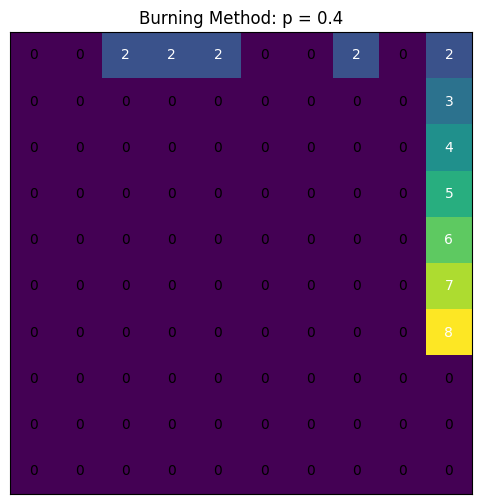

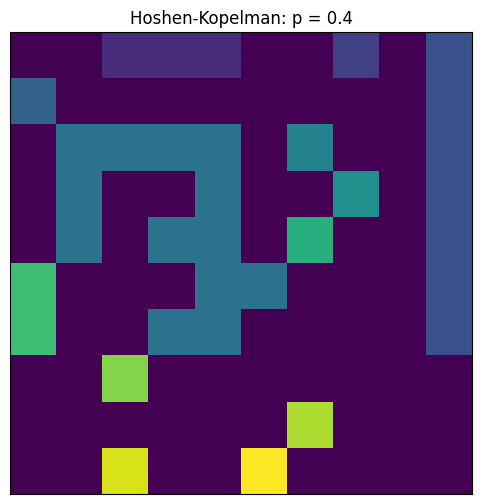

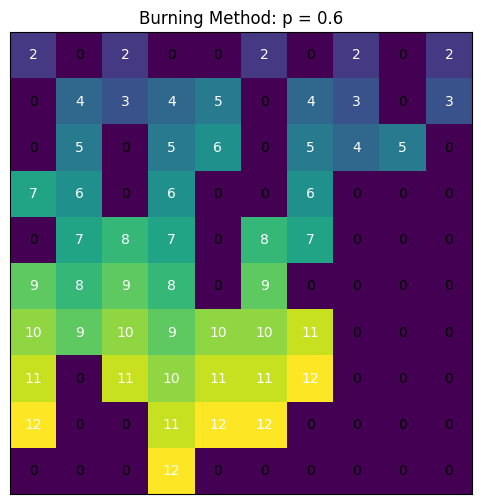

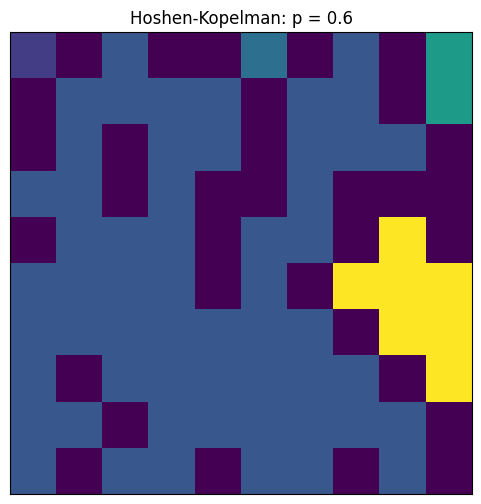

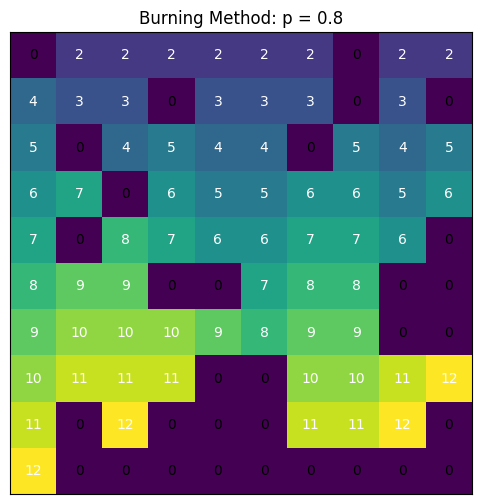

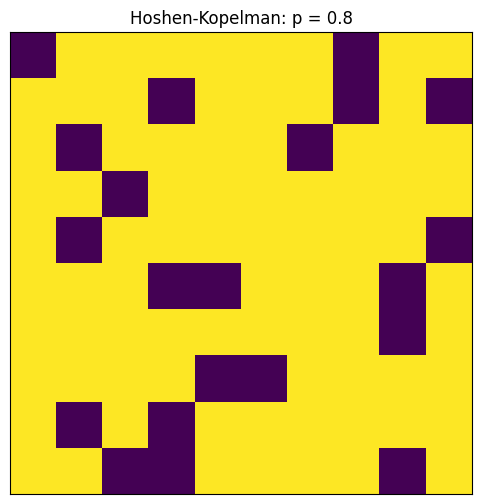

In [ ]:
from percolation import generate_lattice, burning_method, hoshen_kopelman

L = 10
p_values = [0.4, 0.6, 0.8]

for p in p_values:
    lattice = generate_lattice(L, p)
    _, labels = burning_method(lattice)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(labels, cmap='viridis', interpolation='nearest')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            plt.text(j, i, str(labels[i, j]), ha='center', va='center', color='black' if labels[i, j] == 0 else 'white')
    plt.title(f'Burning Method: p = {p}')
    plt.show()
    
    labels, _ = hoshen_kopelman(lattice, True)

    plt.figure(figsize=(6, 6))
    plt.imshow(labels, cmap='viridis', interpolation='nearest')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Hoshen-Kopelman: p = {p}')
    plt.show()
    

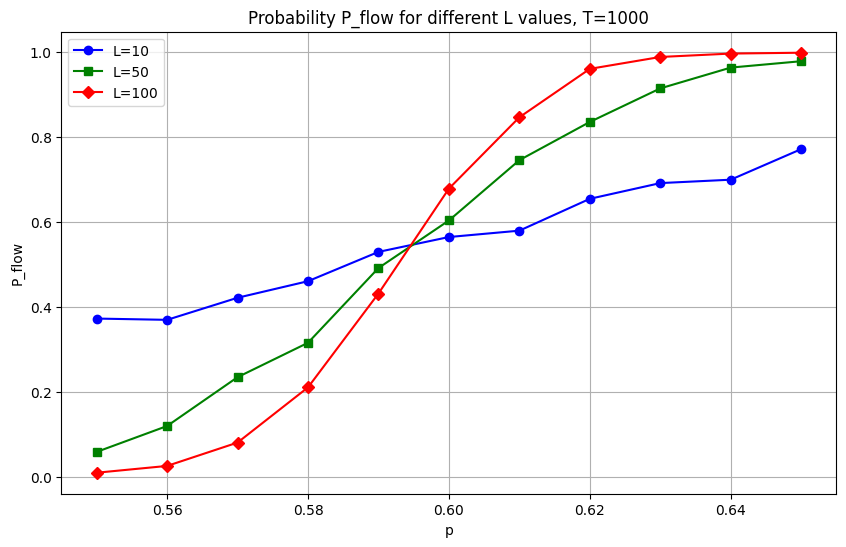

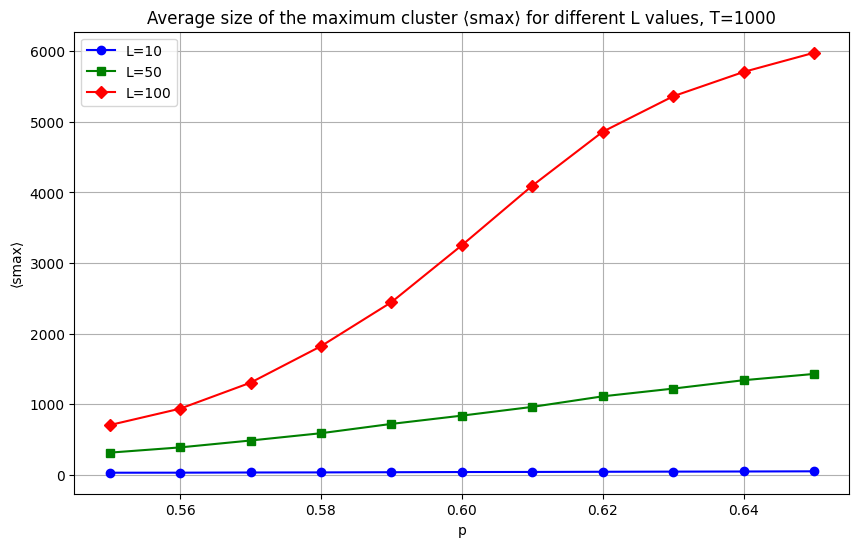

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_results(L_values, T):
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # Different markers for different series
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']  # Different colors for different series

    plt.figure(figsize=(10, 6))
    for i, length in enumerate(L_values):
        results_filename = f'Ave-L{length}T{T}.txt'
        data = np.loadtxt(results_filename)
        p_values = data[:, 0]
        P_flow_values = data[:, 1]
        smax_values = data[:, 2]

        plt.plot(p_values, P_flow_values, marker=markers[i % len(markers)], color=colors[i % len(colors)], linestyle='-', label=f'L={length}')

    plt.xlabel('p')
    plt.ylabel('P_flow')
    plt.legend()
    plt.title(f'Probability P_flow for different L values, T={T}')
    plt.grid(True)
    plt.savefig(f'P_flow_all_L_T{T}.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, length in enumerate(L_values):
        results_filename = f'Ave-L{length}T{T}.txt'
        data = np.loadtxt(results_filename)
        p_values = data[:, 0]
        P_flow_values = data[:, 1]
        smax_values = data[:, 2]

        plt.plot(p_values, smax_values, marker=markers[i % len(markers)], color=colors[i % len(colors)], linestyle='-', label=f'L={length}')

    plt.xlabel('p')
    plt.ylabel('⟨smax⟩')
    plt.legend()
    plt.title(f'Average size of the maximum cluster ⟨smax⟩ for different L values, T={T}')
    plt.grid(True)
    plt.savefig(f'smax_all_L_T{T}.png')
    plt.show()

L_values = [10, 50, 100]
T = 1000
plot_results(L_values, T)

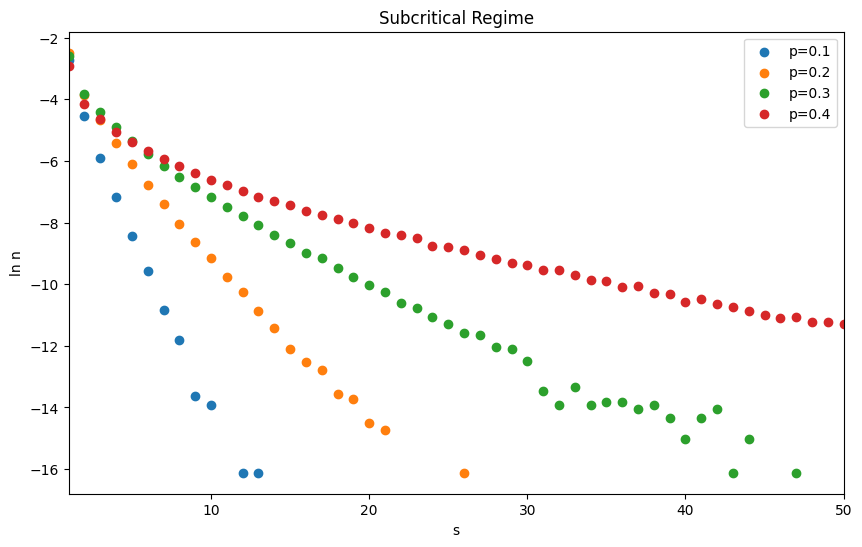

In [ ]:
from collections import Counter
from scipy.optimize import curve_fit

subcritical_p_values = [0.1, 0.2, 0.3, 0.4]

def scaling_law_p_less_pc(s, A1, A2, A3):
    return A1 * s**(-A2) * np.exp(A3 * s)

def scaling_law_p_approx_pc(s, A4, A5):
    return A4 * s**(-A5)

def scaling_law_p_greater_pc(s, A6, A7, A8):
    return A6 * np.exp(-A7 * s**(1 - 1/A8))

def fit_scaling_law(distribution, scaling_law, initial_guess):
    sizes = np.array(list(distribution.keys()))
    counts = np.array(list(distribution.values()))
    popt, pcov = curve_fit(scaling_law, sizes, counts, p0=initial_guess)
    return popt, pcov


params_p_less_pc, _ = fit_scaling_law(distributions[p_values[0]], scaling_law_p_less_pc, [1, 1, -0.1])
params_p_approx_pc, _ = fit_scaling_law(distributions[p_values[1]], scaling_law_p_approx_pc, [1, 1])
params_p_greater_pc, _ = fit_scaling_law(distributions[p_values[2]], scaling_law_p_greater_pc, [1, 1, 1])

def generate_cluster_distribution(L, T, p):
    cluster_distribution = Counter()
    for _ in range(T):
        lattice = generate_lattice(L, p)
        _, cluster_sizes = hoshen_kopelman(lattice)
        cluster_distribution.update(cluster_sizes)
        
    cluster_distribution = {size: count / (T * L**2) for size, count in cluster_distribution.items()}
    return cluster_distribution

distributions = []

for p in subcritical_p_values:
    distributions.append(generate_cluster_distribution(L, T, p))
    
plt.figure(figsize=(10, 6))
for i, p in enumerate(subcritical_p_values):
    sizes = np.array(list(distributions[i].keys()))
    counts = np.array(list(distributions[i].values()))
    
    ln_counts = np.log(counts)
    
    plt.scatter(sizes, ln_counts, label=f'p={p}')
    
plt.xlabel('s')
plt.ylabel('ln n')
plt.xlim(1, 50)
plt.title('Subcritical Regime')
plt.legend()
plt.show()

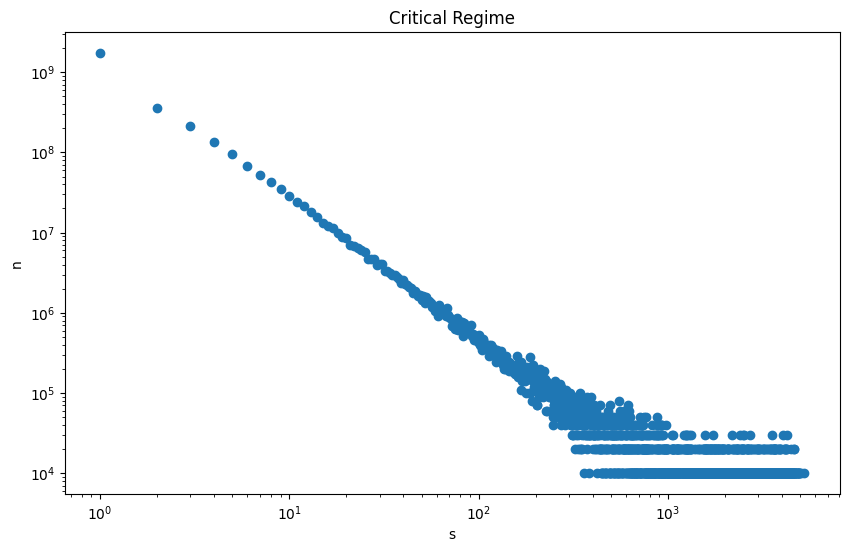

In [33]:
critical_p = 0.592746

distribution = generate_cluster_distribution(L, T, critical_p)
denormalized_distribution = {size: count * L**2 for size, count in distribution.items()}

sizes = np.array(list(denormalized_distribution.keys()))
counts = np.array(list(denormalized_distribution.values()))
 
plt.figure(figsize=(10, 6))  
plt.scatter(sizes, counts)   
plt.xlabel('s')
plt.ylabel('n')
plt.xscale('log')
plt.yscale('log')
plt.title('Critical Regime')
plt.show()

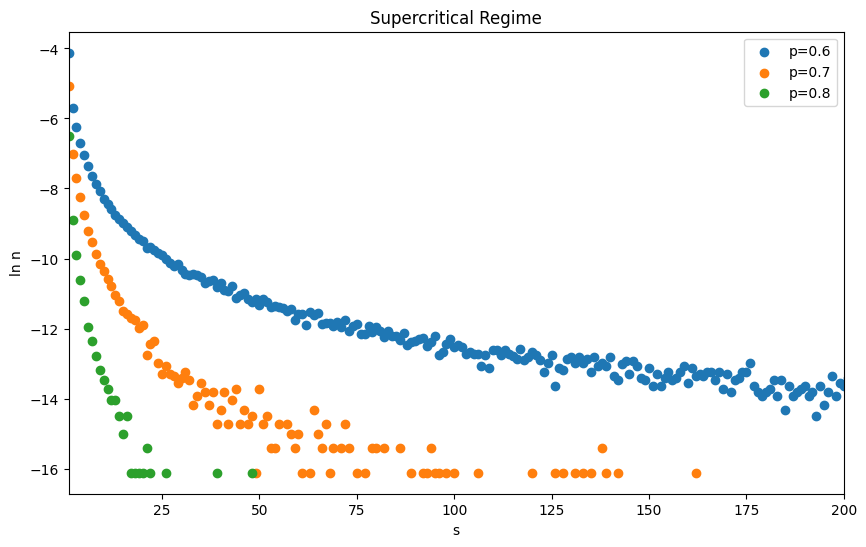

In [42]:
subcritical_p_values = [0.6, 0.7, 0.8]

distributions = []

for p in subcritical_p_values:
    distributions.append(generate_cluster_distribution(L, T, p))
    
plt.figure(figsize=(10, 6))
for i, p in enumerate(subcritical_p_values):
    sizes = np.array(list(distributions[i].keys()))
    counts = np.array(list(distributions[i].values()))
    
    ln_counts = np.log(counts)
    
    plt.scatter(sizes, ln_counts, label=f'p={p}')
    
plt.xlabel('s')
plt.ylabel('ln n')
plt.xlim(1, 200)
plt.title('Supercritical Regime')
plt.legend()
plt.show()